# Function Approximation with a polynomial Model
$y=f(x)=\sin x$ <br />
Approximate this function with a polynomial function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [ ]:
import numpy as  np
import matplotlib.pyplot as plt

In [ ]:
def generateX(N):
    x = np.random.random(N)*2*np.pi
    yd = np.sin(x)
    return x, yd

In [ ]:
x, y = generateX(200)

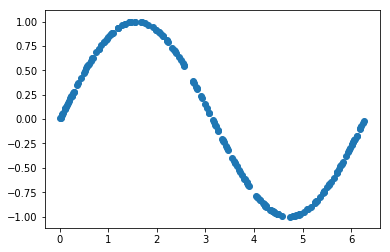

In [ ]:
plt.scatter(x, y)
plt.show()

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [ ]:
def createA(x, D):
    A = np.ones(D+1)
    for d in range(1,  D+1):
        A[d]  = np.power(x, d)/np.power(2*np.pi, d)
    return A

takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$
It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [ ]:
def init_w(D):
    w = np.random.random(D+1)
    return w

In [ ]:
def predict_y(w, x):
    D = len(w)-1
    A = createA(x, D)
    #print("A = ",A)
    #print("w = ", w)
    yhat = A.dot(w)
    return yhat

In [ ]:
def compute_se(yhat, y):
    se = (y-yhat)**2
    return se

In [ ]:
def calc_dw(x, yhat, y, D):
    dw = np.zeros(D+1)
    com = (-2)*(y-yhat)
    dw[0] += com
    for d in range(1, D+1):
        dw[d] +=com*np.power(x, d)/np.power(2*np.pi, d)
    return dw

In [ ]:
def update_w(w, dw, eta):
    w = w-dw*eta
    return w

In [ ]:
def train_w(x, y, w, Nepoch, eta):
    N = len(x)
    D = len(w)-1
    
    for epoch in range(Nepoch):
        for i in range(len(x)):
            #print(w, x[i])
            yhat = predict_y(w, x[i])
            #print(y[i], yhat)
            dw = calc_dw(x[i], yhat,  y[i], D)
            
            w = update_w(w, dw, eta)
    return w

In [ ]:
N = 300
D = 12
Nepoch = 300
eta = 0.001
se = 0
y_pred = []
w = init_w(D)

In [ ]:
x, y = generateX(N)
w =  train_w(x, y, w, Nepoch, eta)

In [ ]:
for i in range(N):
    y_pred.append(predict_y(w, x[i]))
    se += compute_se(y[i], y_pred[i])
    
mse = se/N
y_pred = np.array(y_pred)

In [ ]:
#y_pred

In [ ]:
mse

0.0829358681993941

In [ ]:
def plotmodel(x, y, yd):
    i = x.argsort()
    plt.figure()
    plt.plot(x[i], y[i], "g-o")
    plt.plot(x[i], yd[i],  "r-o")
    plt.ylabel("F(X)")
    plt.xlabel("X")
    plt.legend(["estimated", "True"])
    plt.title("Comparision")
    plt.show()

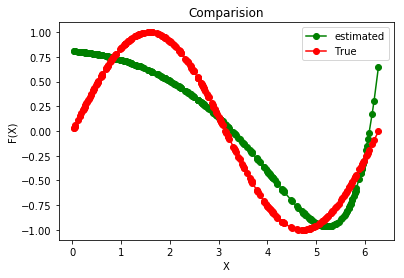

In [ ]:
plotmodel(x, y_pred, y)

In [ ]:
r = np.array([2, 3, 4, 6])

In [ ]:
r*3 +6

array([12, 15, 18, 24])